# More Matplotlib

Matplotlib is the dominant plotting / visualization package in python. It is important to learn to use it well. In the last lecture, we saw some basic examples in the context of learning numpy. This week, we dive much deeper. The goal is to understand how matplotlib represents figures internally.

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

## Figure and Axes

The *figure* is the highest level of organization of matplotlib objects. If we want, we can create a figure explicitly.

In [2]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [3]:
fig = plt.figure(figsize=(13, 5))

<Figure size 1300x500 with 0 Axes>

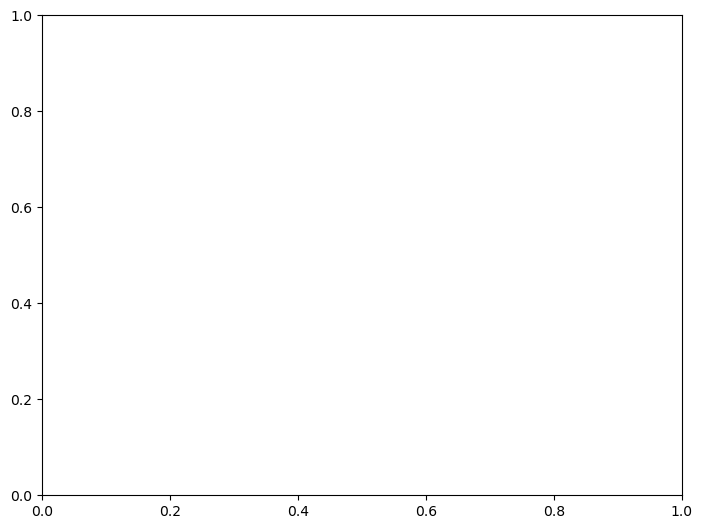

In [4]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

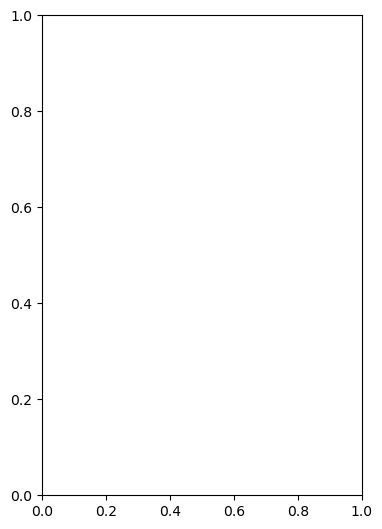

In [5]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 0.5, 1])

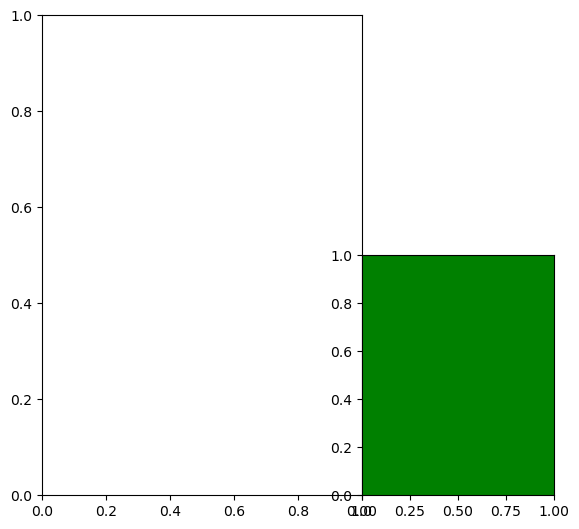

In [7]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 0.5, 1])
ax2 = fig.add_axes([0.5, 0, 0.3, 0.5], facecolor='g')

### Subplots

Subplot syntax is one way to specify the creation of multiple axes.

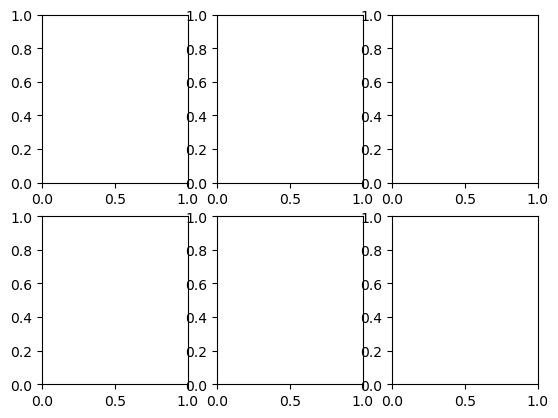

In [8]:
fig = plt.figure()
axes = fig.subplots(nrows=2, ncols=3)

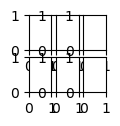

In [12]:
fig = plt.figure(figsize=(1, 1))
axes = fig.subplots(nrows=2, ncols=3)

In [13]:
axes

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

In [14]:
axes[0,0]

<Axes: >

There is a shorthand for doing this all at once.

__This is our recommended way to create new figures!__

In [ ]:
fig, ax = plt.subplots()

In [ ]:
ax

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4), subplot_kw={'facecolor': 'g'})

In [ ]:
axes

## Drawing into Axes

All plots are drawn into axes. It is easiest to understand how matplotlib works if you use the [object-oriented style](https://matplotlib.org/faq/usage_faq.html#coding-styles).

In [15]:
# create some data to plot
import numpy as np
x = np.linspace(-np.pi, np.pi, 100)
y = np.cos(x)
z = np.sin(6*x)

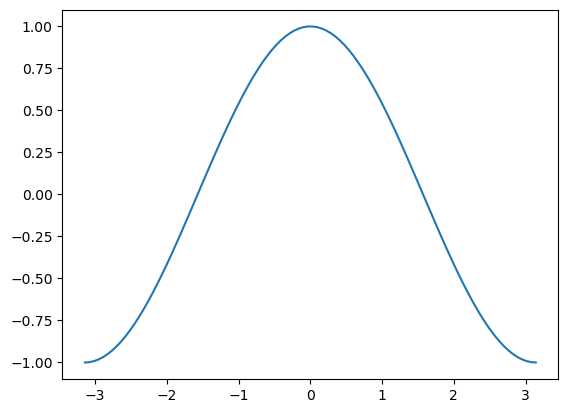

In [16]:
plt.plot(x,y)

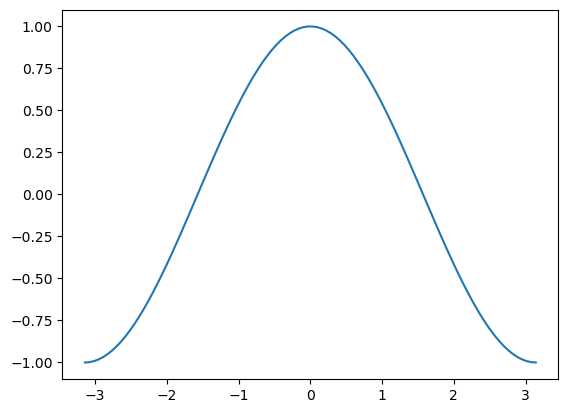

In [22]:
fig, ax = plt.subplots()
plt.plot(x,y)

In [18]:
ax

<Axes: >

In [19]:
ax.plot(x, y)

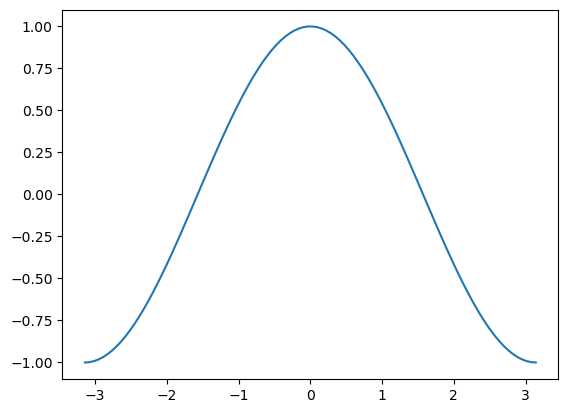

In [21]:
fig

This does the same thing as

In [ ]:
plt.plot(x, y)

This starts to matter when we have multiple axes to worry about.

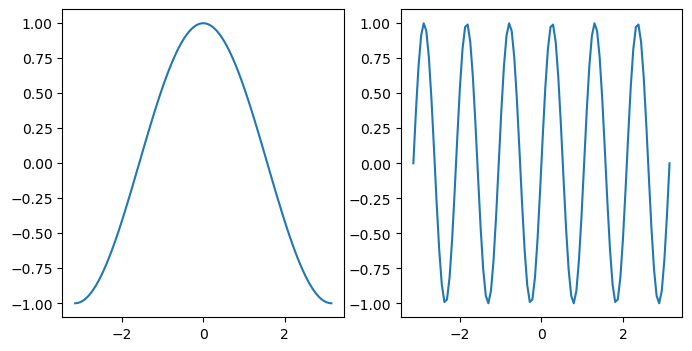

In [23]:
fig, axes = plt.subplots(figsize=(8, 4), ncols=2)
ax0, ax1 = axes
ax0.plot(x, y)
ax1.plot(x, z)

## Labeling Plots

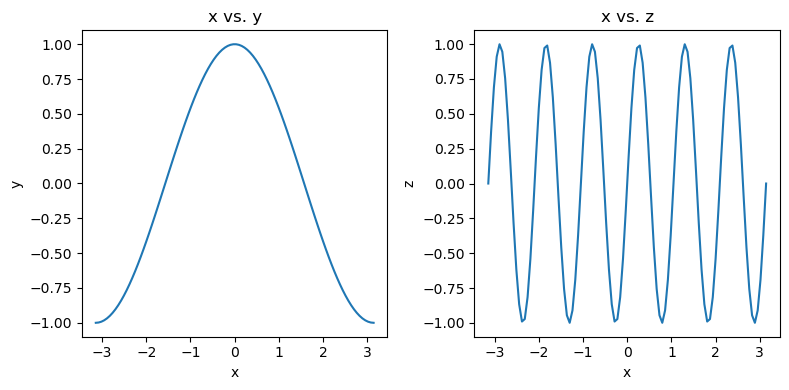

In [24]:
fig, axes = plt.subplots(figsize=(8, 4), ncols=2)
ax0, ax1 = axes

ax0.plot(x, y)
ax0.set_xlabel('x')
ax0.set_ylabel('y')
ax0.set_title('x vs. y')

ax1.plot(x, z)
ax1.set_xlabel('x')
ax1.set_ylabel('z')
ax1.set_title('x vs. z')

# squeeze everything in
plt.tight_layout()

## Customizing Line Plots

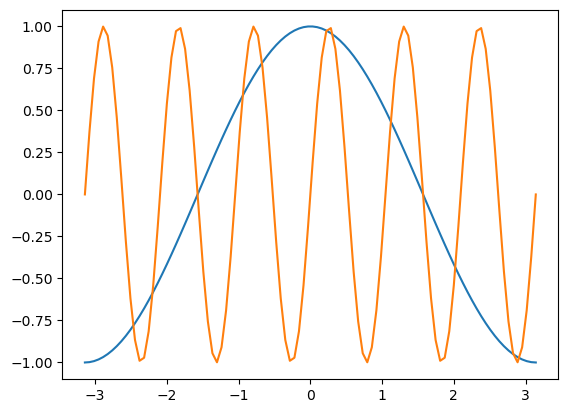

In [25]:
fig, ax = plt.subplots()
ax.plot(x, y, x, z)

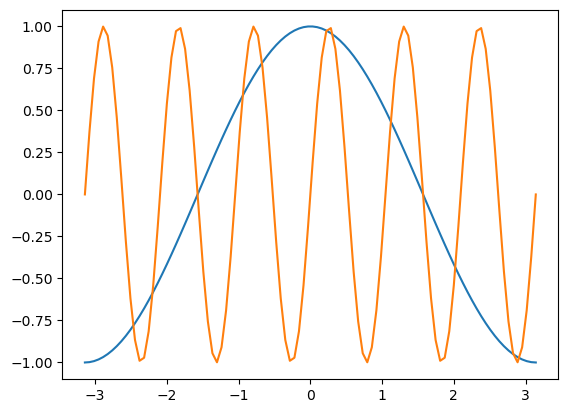

In [26]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x, z)

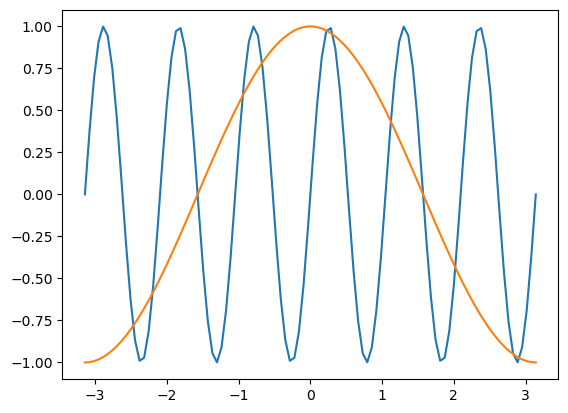

In [28]:
fig, ax = plt.subplots()
ax.plot(x, z)
ax.plot(x, y)


It's simple to switch axes

In [ ]:
fig, ax = plt.subplots()
ax.plot(y, x, z, x)

A "parametric" graph:

In [ ]:
fig, ax = plt.subplots()
ax.plot(y, z)

### Line Styles

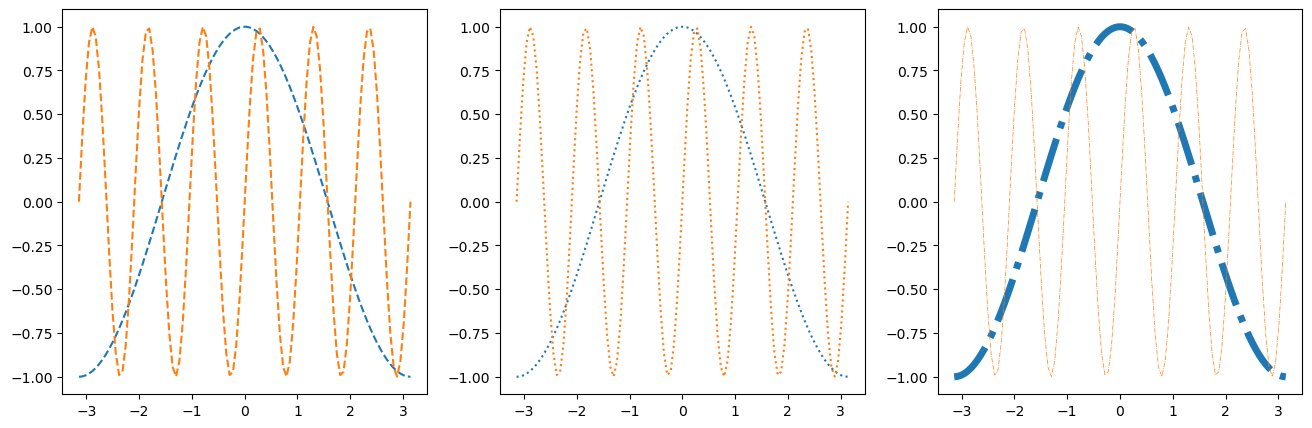

In [27]:
fig, axes = plt.subplots(figsize=(16, 5), ncols=3)
axes[0].plot(x, y, linestyle='dashed')
axes[0].plot(x, z, linestyle='--')

axes[1].plot(x, y, linestyle='dotted')
axes[1].plot(x, z, linestyle=':')

axes[2].plot(x, y, linestyle='dashdot', linewidth=5)
axes[2].plot(x, z, linestyle='-.', linewidth=0.5)


### Colors

As described in the [colors documentation](https://matplotlib.org/2.0.2/api/colors_api.html), there are some special codes for commonly used colors:

- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white

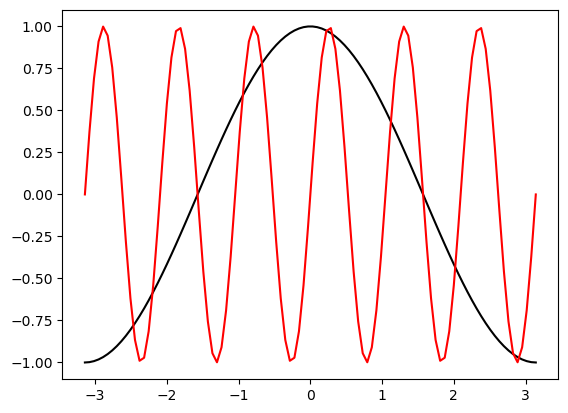

In [29]:
fig, ax = plt.subplots()
ax.plot(x, y, color='k')
ax.plot(x, z, color='r')

Other ways to specify colors:

In [ ]:
fig, axes = plt.subplots(figsize=(16, 5), ncols=3)

# grayscale
axes[0].plot(x, y, color='0.8')
axes[0].plot(x, z, color='0.2')

# RGB tuple
axes[1].plot(x, y, color=(1, 0, 0.7))
axes[1].plot(x, z, color=(0, 0.4, 0.3))

# HTML hex code
axes[2].plot(x, y, color='#00dcba')
axes[2].plot(x, z, color='#b029ee')

There is a default color cycle built into matplotlib.

In [ ]:
plt.rcParams['axes.prop_cycle']

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
for factor in np.linspace(0.2, 1, 11):
    ax.plot(x, factor*y)

### Markers

There are [lots of different markers](https://matplotlib.org/api/markers_api.html) availabile in matplotlib!

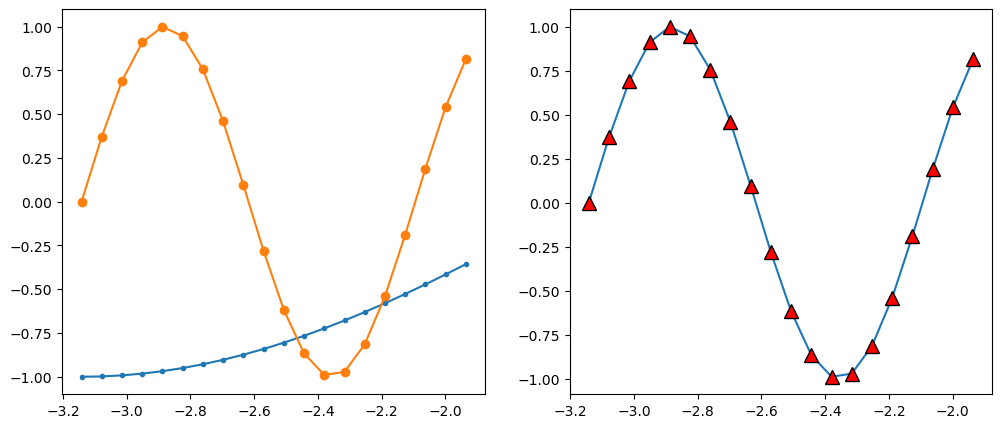

In [30]:
fig, axes = plt.subplots(figsize=(12, 5), ncols=2)

axes[0].plot(x[:20], y[:20], marker='.')
axes[0].plot(x[:20], z[:20], marker='o')

axes[1].plot(x[:20], z[:20], marker='^',
             markersize=10, markerfacecolor='r',
             markeredgecolor='k')

### Label, Ticks, and Gridlines

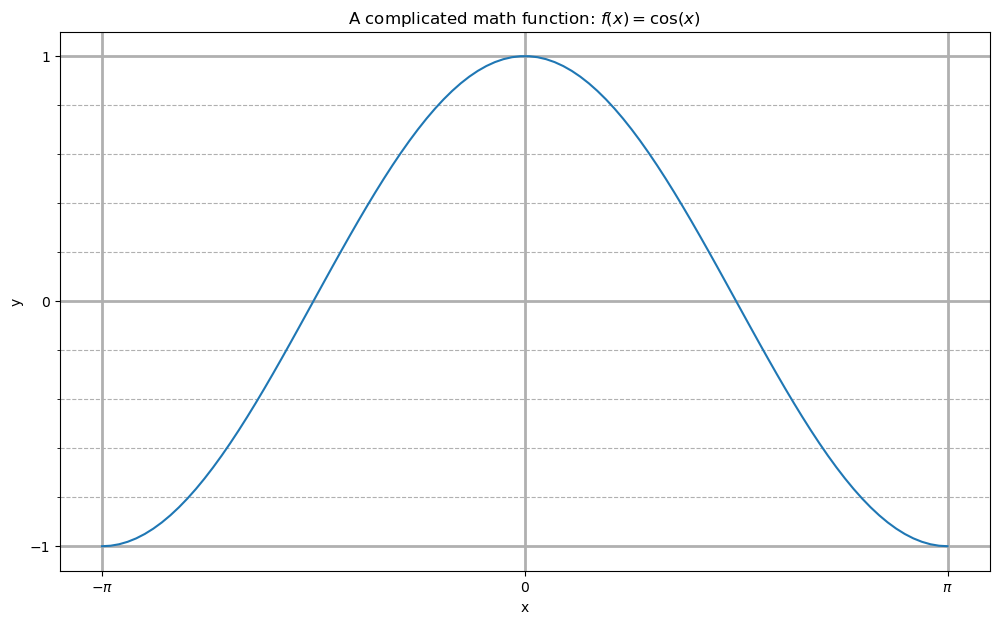

In [31]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(x, y)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(r'A complicated math function: $f(x) = \cos(x)$')

ax.set_xticks(np.pi * np.array([-1, 0, 1]))
ax.set_xticklabels([r'$-\pi$', '0', r'$\pi$'])
ax.set_yticks([-1, 0, 1])

ax.set_yticks(np.arange(-1, 1.1, 0.2), minor=True)
#ax.set_xticks(np.arange(-3, 3.1, 0.2), minor=True)

ax.grid(which='minor', linestyle='--')
ax.grid(which='major', linewidth=2)


### Axis Limits

(-3.0, 3.0)

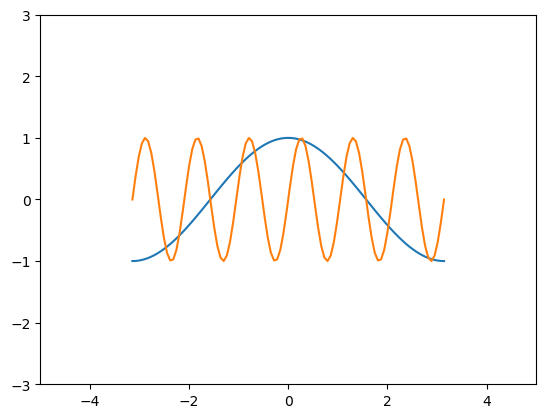

In [32]:
fig, ax = plt.subplots()
ax.plot(x, y, x, z)
ax.set_xlim(-5, 5)
ax.set_ylim(-3, 3)

### Text Annotations

Text(0, 0, 'the maximum')

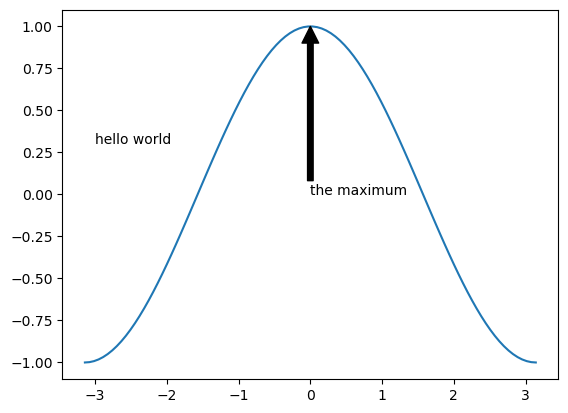

In [33]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.text(-3, 0.3, 'hello world')
ax.annotate('the maximum', xy=(0, 1),
             xytext=(0, 0), arrowprops={'facecolor': 'k'})

## Other 1D Plots

### Scatter Plots

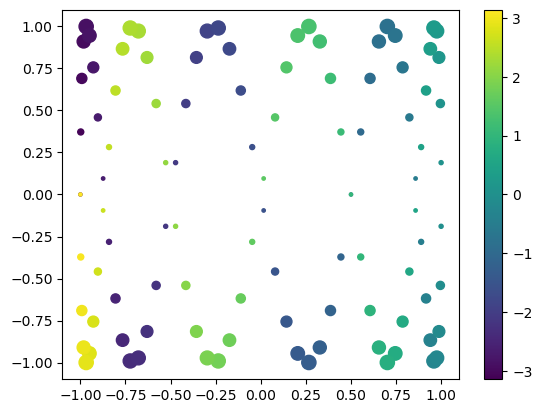

In [34]:
fig, ax = plt.subplots()

splot = ax.scatter(y, z, c=x, s=(100*z**2 + 5))
fig.colorbar(splot)

### Bar Plots

<BarContainer object of 3 artists>

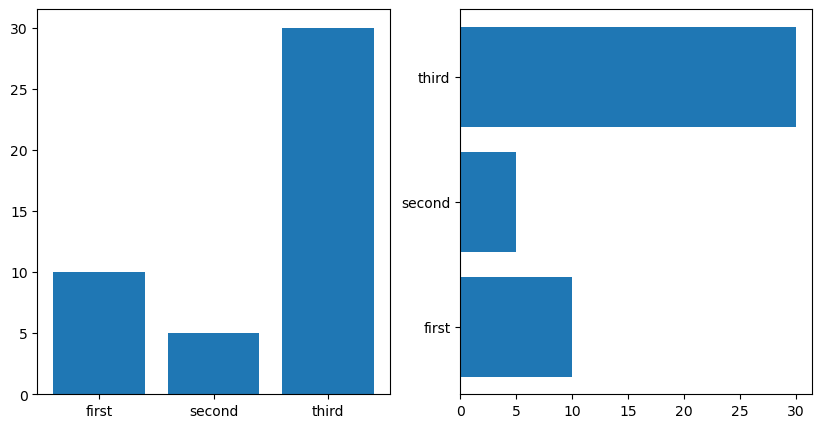

In [35]:
labels = ['first', 'second', 'third']
values = [10, 5, 30]

fig, axes = plt.subplots(figsize=(10, 5), ncols=2)
axes[0].bar(labels, values)
axes[1].barh(labels, values)

## 2D Plotting Methods

### imshow

In [36]:
x1d = np.linspace(-2*np.pi, 2*np.pi, 100)
y1d = np.linspace(-np.pi, np.pi, 50)
xx, yy = np.meshgrid(x1d, y1d)
f = np.cos(xx) * np.sin(yy)
print(f.shape)

(50, 100)


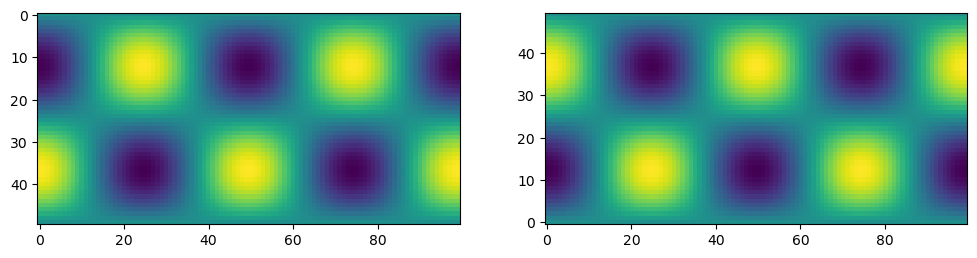

In [37]:
fig, ax = plt.subplots(figsize=(12,4), ncols=2)
ax[0].imshow(f)
ax[1].imshow(f, origin='lower')

### pcolormesh

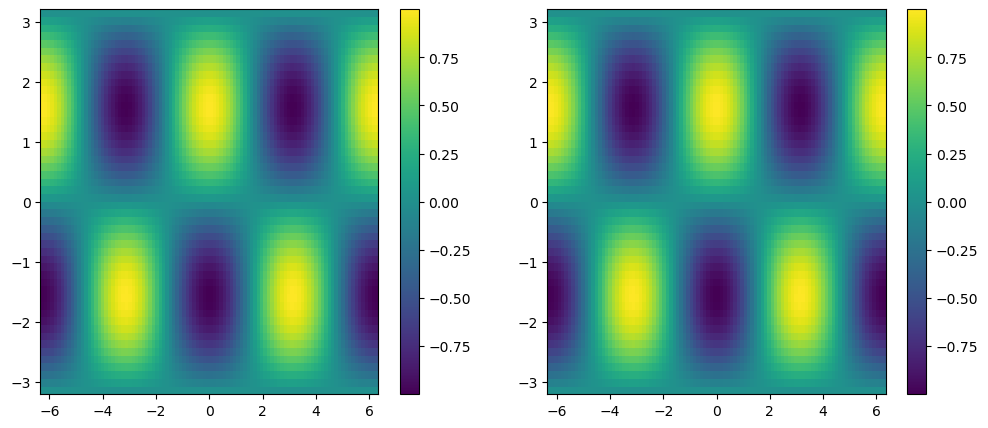

In [38]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
pc0 = ax[0].pcolormesh(x1d, y1d, f)
pc1 = ax[1].pcolormesh(xx, yy, f)
fig.colorbar(pc0, ax=ax[0])
fig.colorbar(pc1, ax=ax[1])


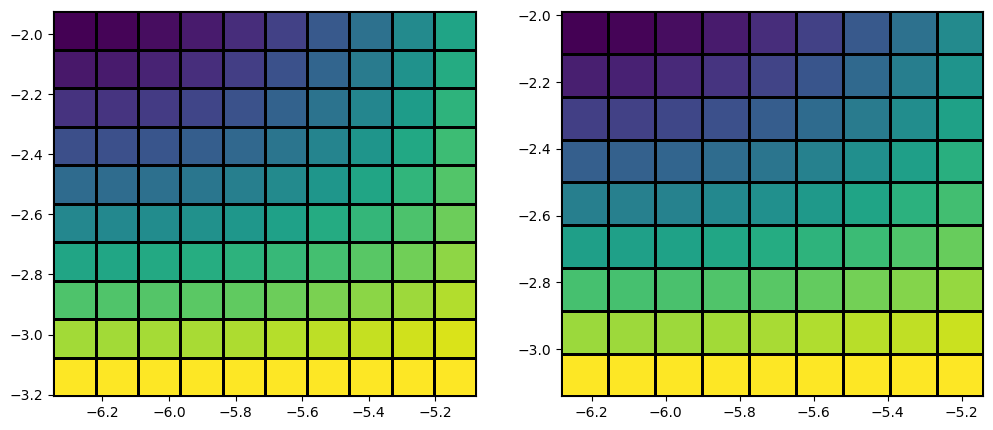

In [39]:
x_sm, y_sm, f_sm = xx[:10, :10], yy[:10, :10], f[:10, :10]

fig, ax = plt.subplots(figsize=(12,5), ncols=2)

# last row and column ignored!
ax[0].pcolormesh(x_sm, y_sm, f_sm, edgecolors='k')

# same!
ax[1].pcolormesh(x_sm, y_sm, f_sm[:-1, :-1], edgecolors='k')


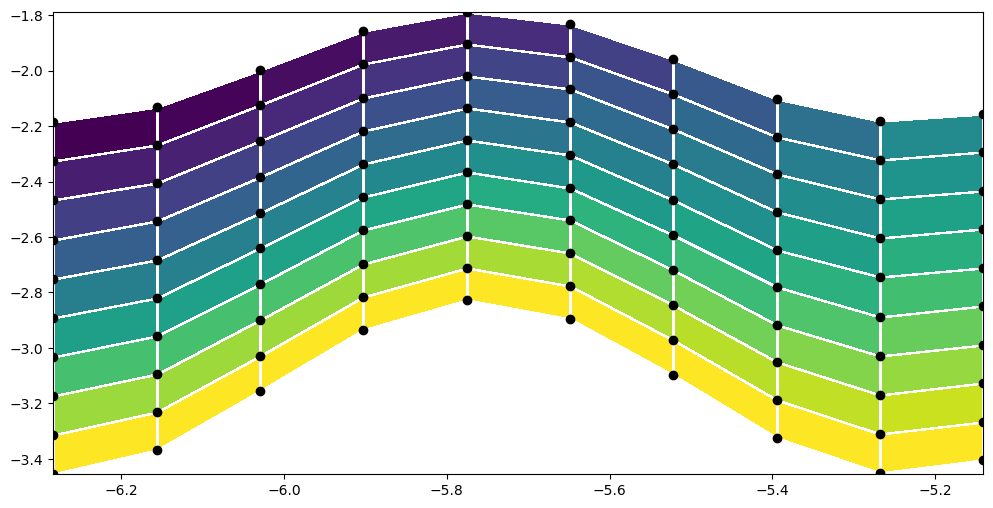

In [40]:
y_distorted = y_sm*(1 + 0.1*np.cos(6*x_sm))

plt.figure(figsize=(12,6))
plt.pcolormesh(x_sm, y_distorted, f_sm[:-1, :-1], edgecolors='w')
plt.scatter(x_sm, y_distorted, c='k')

### contour / contourf

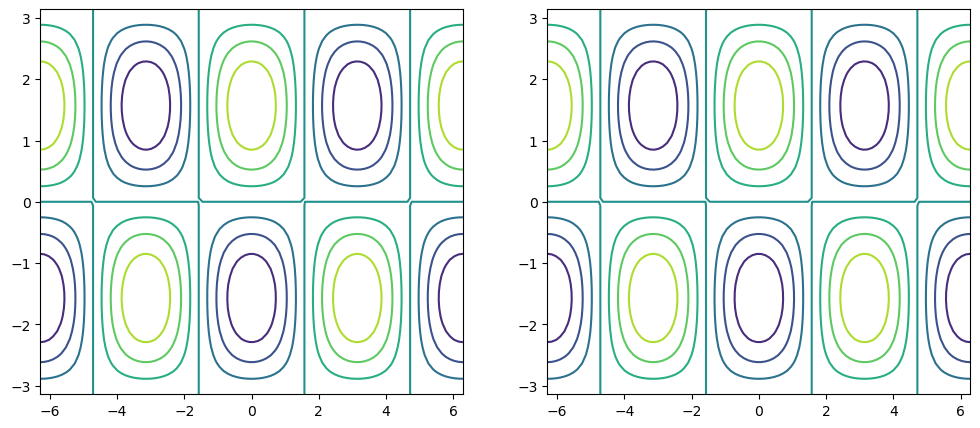

In [41]:
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)

# same thing!
ax[0].contour(x1d, y1d, f)
ax[1].contour(xx, yy, f)

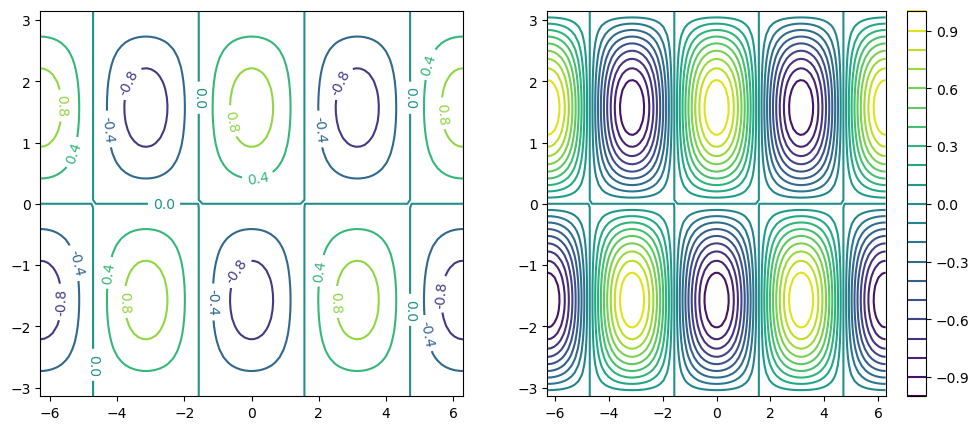

In [42]:
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)

c0 = ax[0].contour(xx, yy, f, 5)
c1 = ax[1].contour(xx, yy, f, 20)

plt.clabel(c0, fmt='%2.1f')
plt.colorbar(c1, ax=ax[1])

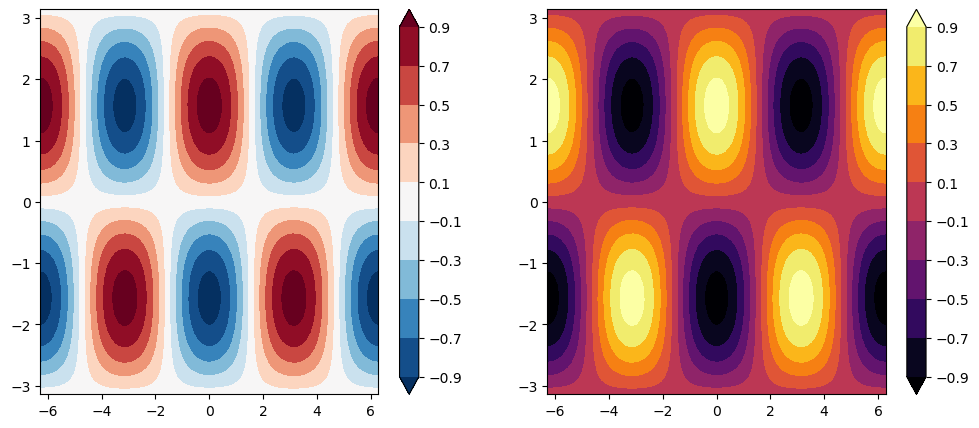

In [44]:
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)

clevels = np.arange(-1, 1, 0.2) + 0.1

cf0 = ax[0].contourf(xx, yy, f, clevels, cmap='RdBu_r', extend='both')
cf1 = ax[1].contourf(xx, yy, f, clevels, cmap='inferno', extend='both')

fig.colorbar(cf0, ax=ax[0])
fig.colorbar(cf1, ax=ax[1])
plt.savefig('test_fig.png')

### quiver

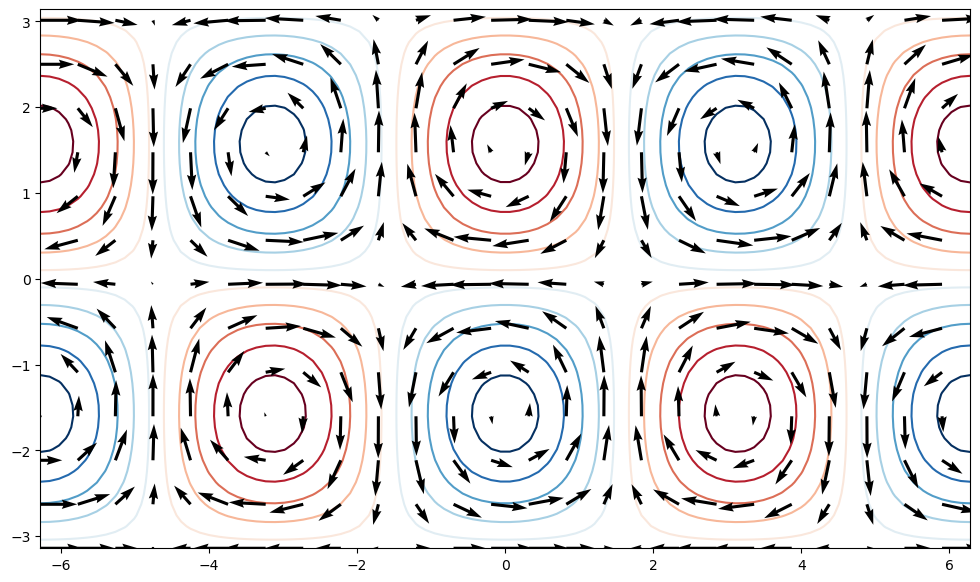

In [45]:
u = -np.cos(xx) * np.cos(yy)
v = -np.sin(xx) * np.sin(yy)

fig, ax = plt.subplots(figsize=(12, 7))
ax.contour(xx, yy, f, clevels, cmap='RdBu_r', extend='both', zorder=0)
ax.quiver(xx[::4, ::4], yy[::4, ::4],
           u[::4, ::4], v[::4, ::4], zorder=1)

### streamplot

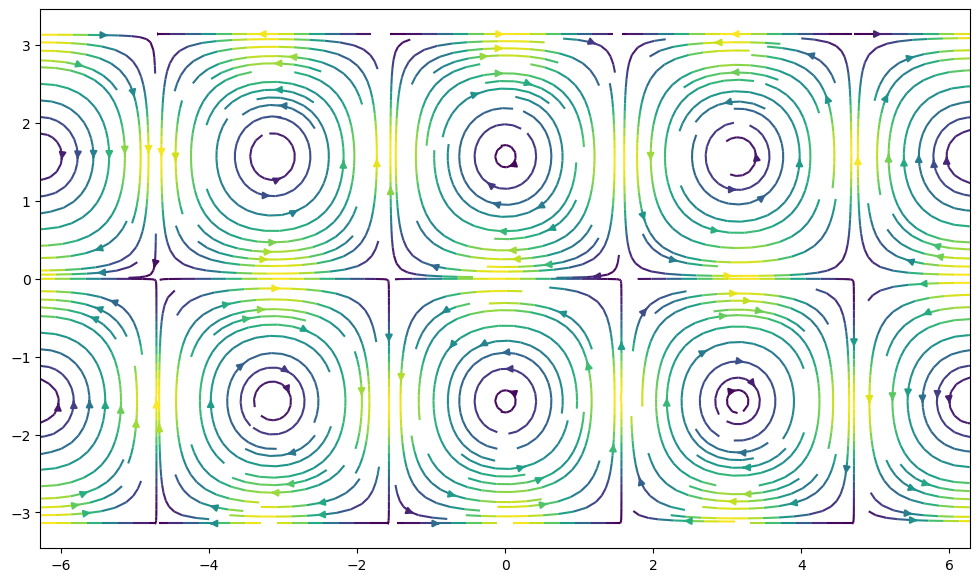

In [46]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.streamplot(xx, yy, u, v, density=2, color=(u**2 + v**2))